# Classification Models - To predict diabetes

* Project: To predict diabetes
* Project Scope: Analyze,Visualize and apply Classification models on diabetes dataset
* Data source: [Kaggle](https://www.kaggle.com/saurabh00007/diabetescsv) 

## Import libraries & Load data

In [145]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load US housig data
dataset = pd.read_csv('diabetes.csv')

## Lets  analyze and visualize data 

In [79]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* We can see there are 9 Columns and its datatypes:
* Out of 9 columns, 8 are input variables/features (X), 1 output /target variable (y) 
* There are 768 rows/training examples (m)

In [80]:
# lets check the data
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data in this data set is self explanatory. One thing we can notice is we dont have any categorical colums in our dataset

In [81]:
# Checking for null columns
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We dont have null values

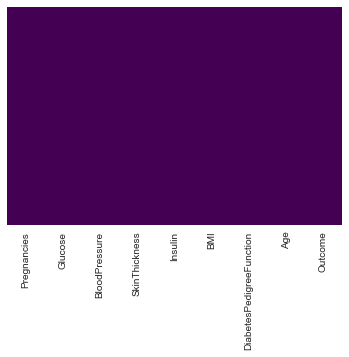

In [82]:
# Lets Visualize null data
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [83]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

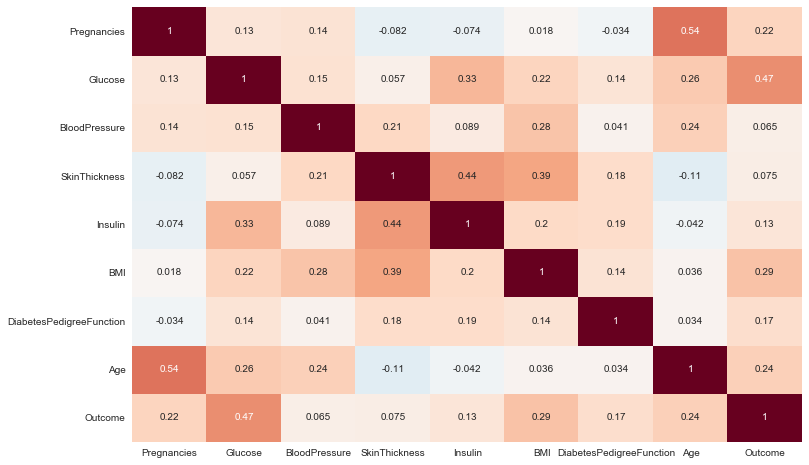

In [84]:
#Correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cbar=False)
plt.show()

We can see there is positive correlation between Pregnancies and age, negative correlation between skin thickness and age

** Diabetes count **

In [85]:
dataset['Outcome'] .value_counts()

0    500
1    268
Name: Outcome, dtype: int64

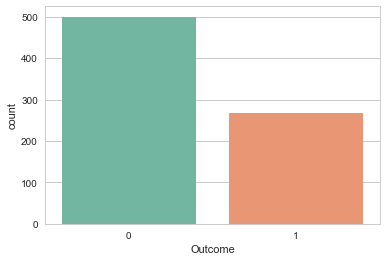

In [86]:
# Visualize diabetes count
sns.set_style('whitegrid')
sns.countplot(x = 'Outcome', 
              data = dataset,
              palette ='Set2')
plt.show()

We can see about one-third have diabetes in our dataset

# Implementing different Classifiction models

In [87]:
# Spliting data into input and output variables
X = dataset.drop('Outcome', axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 8)
(768,)


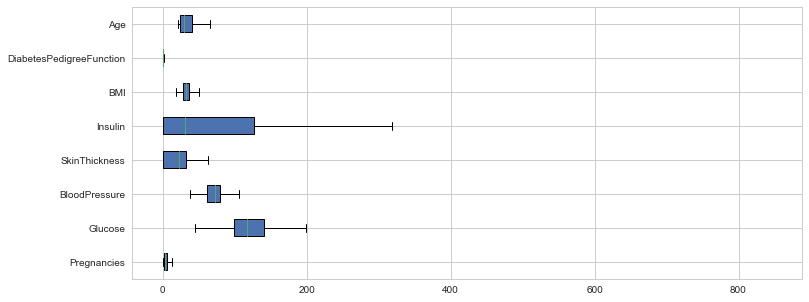

In [88]:
plt.figure(figsize=(12,5))
plt.boxplot(X.values,labels=X.columns,vert=False,patch_artist=True)
plt.show()

## 1. Logistic Regression

In [89]:
# Lets first check the P-Value of the features
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                 0.05922
Time:                        16:05:22   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072

The p-values for all the features are smaller than 0.05, except 'SkinThickness', 'BMI'. Lets first take out the 'SkinThickness' feature and retest for P-value

In [90]:
# dropping 'SkinThickness'
X = dataset.drop(['Outcome','SkinThickness'], axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 7)
(768,)


In [91]:
# Checking P-Value after 'SkinThickness' feature dropped
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608499
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                 0.05922
Time:                        16:05:28   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 7.777e-11
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072

In [92]:
# dropping 'BMI'

In [93]:
X = dataset.drop(['Outcome','SkinThickness','BMI'], axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 6)
(768,)


In [94]:
# Checking P-Value after 'SkinThickness','BMI' features dropped
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608642
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                 0.05899
Time:                        16:05:34   Log-Likelihood:                -467.44
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.354e-11
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1289      0.029      4.500      0.000       0.073

P-values looks good other features looks good. Lets now continue with the model

** Spliting data into test and train sets **

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(537, 6)
(231, 6)
(537,)
(231,)


** Feature Scaling **

In [96]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
# Lets see how the data will be after feature scaling
X_train[:2,:]

array([[-1.1241888 , -0.10700145, -0.37480164,  0.04261553,  3.58467722,
        -1.05388114],
       [-0.82503648, -0.07530825,  0.99320842,  0.71715974,  0.07463449,
        -0.62318542]])

In [98]:
X_test[:2,:]

array([[-1.1241888 , -0.51901312,  0.76520674, -0.69855034,  0.74567207,
         2.47782374],
       [ 0.07242049, -1.43811607, -0.48880248, -0.69855034, -0.25801661,
        -0.70932457]])

** Fitting Logistic Regression to the Training set **

In [99]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 99).fit(X_train, y_train)

In [100]:
print("Training set accuracy: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(classifier.score(X_test, y_test)))

Training set accuracy: 0.750
Test set accuracy: 0.766


** Regularization**

The default regularization value (C)=1 provides with 75% accuracy on training dataset and 75% accuracy on test dataset. Lets try on different regularization values. C= 0.01, 0.1, 10, 100

In [130]:
for C in [0.01,0.1,1,10,100]:
    classifier_r = LogisticRegression(C=C).fit(X_train, y_train)
    
    print(f'For value of C is {C}')
    print("Training set accuracy: {:.3f}".format(classifier_r.score(X_train, y_train)))
    print("Test set accuracy: {:.3f}".format(classifier_r.score(X_test, y_test)))
    print('\n')

For value of C is 0.01
Training set accuracy: 0.764
Test set accuracy: 0.779


For value of C is 0.1
Training set accuracy: 0.775
Test set accuracy: 0.779


For value of C is 1
Training set accuracy: 0.775
Test set accuracy: 0.784


For value of C is 10
Training set accuracy: 0.773
Test set accuracy: 0.784


For value of C is 100
Training set accuracy: 0.773
Test set accuracy: 0.788




We can notice that as the value of C decreases, accuracy is decreasing. Increasing from default has not impact. So lets stick to our default regularization value

** Predicting the Test set results **

In [102]:
y_pred = classifier.predict(X_test)

** Evaluating the model **

In [103]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[136,  19],
       [ 35,  41]])

In [104]:
print('Training set accuracy: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Training set accuracy: 0.75
Test set accuracy: 0.77


In [105]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.88      0.83       155
          1       0.68      0.54      0.60        76

avg / total       0.76      0.77      0.76       231



Our mode has 75% accurate in predecting the Target outcome. This is pretty good given the size of the dataset we have.

** Receiver Operating Characteristics Curve **

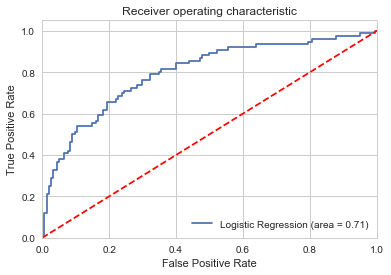

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

## 2. k-Nearest Neighbors
This algorithm finds the closest data point (neighbor) in the training dataset to the new datapoint

** Spliting data into input and output variables **

In [107]:
X = dataset.drop('Outcome', axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 8)
(768,)


** Feature Scaling **

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [109]:
# Lets see how the data will be after feature scaling
X_scaled[:2,:]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

** Spliting data into input and output variables **

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(537, 8)
(231, 8)
(537,)
(231,)


** Choosing K value **

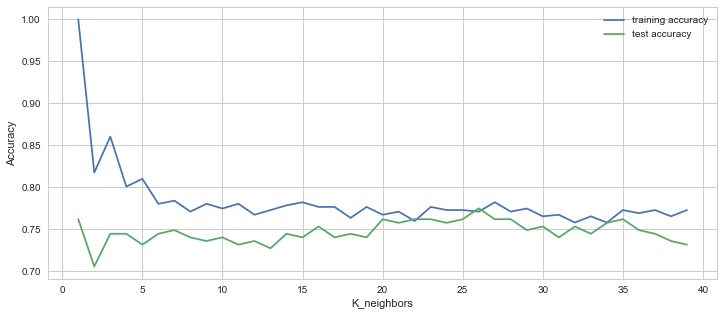

In [111]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 40
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(12,5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K_neighbors")
plt.legend()
plt.savefig('knn_compare_model')
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of K_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 22 neighbors.

** Test set results based on K values identified **

In [112]:
# Lets compare K =1,9,20,26,27

from sklearn.metrics import classification_report,confusion_matrix
for k in [1,9,20,26,27]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    X_pred = knn.predict(X_test)
    print(f'For value of k is {k}')
    print(classification_report(y_test,X_pred))
    print('\n')

For value of k is 1
             precision    recall  f1-score   support

          0       0.85      0.78      0.81       155
          1       0.62      0.72      0.67        76

avg / total       0.78      0.76      0.77       231



For value of k is 9
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       155
          1       0.61      0.54      0.57        76

avg / total       0.73      0.74      0.73       231



For value of k is 20
             precision    recall  f1-score   support

          0       0.77      0.91      0.84       155
          1       0.71      0.46      0.56        76

avg / total       0.75      0.76      0.75       231



For value of k is 26
             precision    recall  f1-score   support

          0       0.77      0.95      0.85       155
          1       0.82      0.41      0.54        76

avg / total       0.78      0.77      0.75       231



For value of k is 27
             precision    rec

**Predicting and Evaluating Model**

In [113]:
# Now with k =1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
X_pred = knn.predict(X_test)

print(confusion_matrix(y_test,X_pred))
print(classification_report(y_test,X_pred))

[[121  34]
 [ 21  55]]
             precision    recall  f1-score   support

          0       0.85      0.78      0.81       155
          1       0.62      0.72      0.67        76

avg / total       0.78      0.76      0.77       231



Our model has 78% accurate in predecting the Target outcome. This is pretty good given the size of the dataset we have.

## 3. Support Vector Machine (Kernel)
This algorithm uses kernel(Gaussian) to classify the data

** Spliting data into input and output variables **

In [131]:
X = dataset.drop('Outcome', axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 8)
(768,)


** Feature Scaling **

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [134]:
# Lets see how the data will be after feature scaling
X_scaled[:2,:]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

** Spliting data into train and test data **

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(537, 8)
(231, 8)
(537,)
(231,)


** Fitting Suport Vector Machine Model to the Training set **

In [137]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 99)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=99, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
# Lets check the accuracy of train and test results
print("Training set accuracy: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(classifier.score(X_test, y_test)))

Training set accuracy: 0.827
Test set accuracy: 0.762


We got accuracy 76% for test results and 82% for training. Lets see if we can increace accuracy by adding regularization and gamma parameters

** Grid search with Regularization and Gamma **

The default regularization value (C)=1 and gama ='auto' gave us 82% accuracy on training dataset and 76% accuracy on test dataset. Lets try on different regularization values(C): [0.1,1, 10, 100], and Gamma values (gamma): [1,0.1,0.01,0.001]

In [140]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

** Predicting the test results with Grid model **

Now lets take this grid model to predict the test set

In [142]:
y_grid_pred = grid.predict(X_test)

** Evaluating the model **

In [143]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_grid_pred)
cm

array([[135,  20],
       [ 31,  45]])

In [144]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_grid_pred))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       155
          1       0.69      0.59      0.64        76

avg / total       0.77      0.78      0.77       231



We can see our Support Vector Machine model accuracy has slightly to 77% after applying grid model with different regularization and gamma values.

## 4. Decision Tree

** Spliting data into input and output variables **

In [146]:
X = dataset.drop('Outcome', axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 8)
(768,)


** Spliting data into train and test data **

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(537, 8)
(231, 8)
(537,)
(231,)


** Fitting Decision Tree to Training set **

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 99)

In [150]:
# Finding best parameters
import time
start = time.time()

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None]}

gridsearch = GridSearchCV(classifier, cv = 10,
                     param_grid=parameters, 
                     n_jobs = -1) 
                     #verbose=2) will print the details

gridsearch.fit(X_train, y_train)
print('Best Parameters using grid search: \n', gridsearch.best_params_)

end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
Time taken in grid search:  8.44


In [152]:
classifier.set_params(criterion='gini',max_depth=4,max_features='log2,random_state = 99)

classifier.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 0.808
Accuracy on test set: 0.771


** Predicting Test results and evaluating model **

In [154]:
y_pred = classifier.predict(X_test)

In [155]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[133,  22],
       [ 31,  45]])

In [156]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.86      0.83       155
          1       0.67      0.59      0.63        76

avg / total       0.77      0.77      0.77       231



** Feature importance **

In [157]:
print("Feature importances:\n{}".format(classifier.feature_importances_))

Feature importances:
[ 0.05183987  0.59827761  0.0121506   0.          0.          0.15723689
  0.07516187  0.10533316]


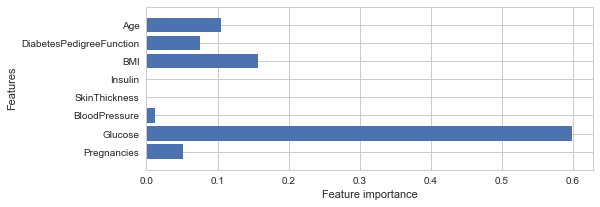

In [158]:
# Visualizing the feature importances
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,3))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(classifier)
plt.savefig('feature_importance')

Feature 'Glucose" is by far the most important feature,Insulin and skinThickness has no importance at all

## 4. Random Forest

** Spliting data into input and output variables **

In [161]:
X = dataset.drop('Outcome', axis =1)
y = dataset['Outcome']
for item in [X, y]:
    print(item.shape)

(768, 8)
(768,)


** Spliting data into train and test data **

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(537, 8)
(231, 8)
(537,)
(231,)


** Fitting Random Forest to Training set **

In [164]:
# Importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(random_state = 99)

In [165]:
import time
start = time.time()

parameters = {'n_estimators':[1000],
              'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

gridsearch = GridSearchCV(classifier, cv = 10,
                     param_grid=parameters, 
                     n_jobs = -1) 
                     #verbose=2) will print the details

gridsearch.fit(X_train, y_train)
print('Best Parameters using grid search: \n', gridsearch.best_params_)

end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'n_estimators': 1000}
Time taken in grid search:  382.74


In [166]:
classifier.set_params(n_estimators = 1000, 
                      criterion='entropy',
                      max_depth=4,
                      max_features=None,
                      random_state = 99)

classifier.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 0.827
Accuracy on test set: 0.758


** Predicting Test results and evaluating model **

In [167]:
y_pred = classifier.predict(X_test)

In [168]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[126,  29],
       [ 27,  49]])

In [169]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.81      0.82       155
          1       0.63      0.64      0.64        76

avg / total       0.76      0.76      0.76       231



** Feature importance **

In [170]:
print("Feature importances:\n{}".format(classifier.feature_importances_))

Feature importances:
[ 0.03551515  0.4869041   0.02805094  0.01692091  0.02456075  0.18624908
  0.11052305  0.111276  ]


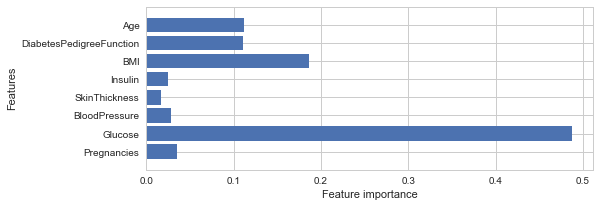

In [171]:
# Visualizing the feature importances
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,3))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(classifier)
plt.savefig('feature_importance')

Feature 'Glucose" is by far the most important feature. All other features have some importance

To conclude, after running through differnt classification models to predicat diabetes, we can conclude K Nearest Neighbors has slight edge in fitting well with the data with accuracy of 78%. Finally the input 'Glucose' is by far the most important feature that impacts the outcome with 48% importance